<a id="t1."></a>
# 1. Import Data & Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

C:\Users\Sanket Takle\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading the csv file in a dataframe
df=pd.read_csv('Asteroid.csv')
df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [3]:
# to check the number of rows and columns in the dataset
df.shape

(839736, 27)

In [4]:
# to check out the  information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   


# Data Preprocessing and EDA

In [5]:
# Checking the missing values in the dataset
df.isnull().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [6]:
#transforming to numeric, setting errors to NaN
df['diameter']= pd.to_numeric(df['diameter'],errors='coerce') 

In [7]:
#rows with nan diameters to drop
dropindexes = df['diameter'][df['diameter'].isnull()].index 
df = df.drop(dropindexes, axis=0) 

In [8]:
df.shape

(137680, 27)

In [9]:
df.isnull().sum()

full_name              0
a                      0
e                      0
G                 137562
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             140
condition_code         0
n_obs_used             0
H                    751
diameter               0
extent            137665
albedo              1232
rot_per           126493
GM                137667
BV                136676
UB                136716
IR                137679
spec_B            136311
spec_T            136716
neo                    0
pha                    0
moid                   0
dtype: int64

<a id="t2.1."></a>
## 2.1. Dropping Features

In [10]:
#Dropping the features with high ratio of missing values and full_name(as it is not relevant)
df=df.drop(['full_name','G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T'],axis=1)
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,N,N,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,N,N,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,N,N,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,N,N,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,N,N,1.09589


In [11]:
df.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           140
condition_code       0
n_obs_used           0
H                  751
diameter             0
albedo            1232
neo                  0
pha                  0
moid                 0
dtype: int64

<a id="t2.2."></a>
## 2.2. data_arc - Missing Values

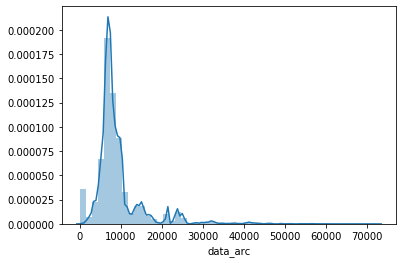

In [12]:
sns.distplot(df.data_arc.dropna())

In [13]:
#descrption about data_arc feature
print(df['data_arc'].describe())
print('\nThe maximum repeated value is : ',df['data_arc'].value_counts().index[0])

count    137540.000000
mean       8908.697681
std        6150.505469
min           1.000000
25%        6265.000000
50%        7492.000000
75%        9655.000000
max       72684.000000
Name: data_arc, dtype: float64

The maximum repeated value is :  1.0


In [14]:
#Since median is greater than mean, it is positively skewed. Hence, imputing with median.
df['data_arc'].fillna(df['data_arc'].median() , inplace = True) # median is the best option here 

<a id="t2.3."></a>
## 2.3. H - Missing Values

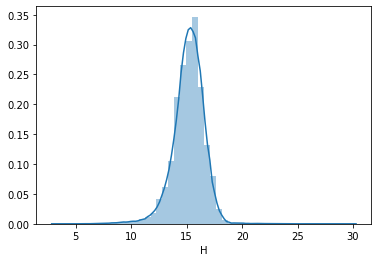

In [15]:
sns.distplot(df.H.dropna())

In [16]:
print(df['H'].describe())
print('\nThe maximum repeated value is : ',df['H'].value_counts().index[0])

count    136929.00000
mean         15.17739
std           1.40739
min           3.20000
25%          14.40000
50%          15.30000
75%          16.10000
max          29.90000
Name: H, dtype: float64

The maximum repeated value is :  15.2


In [17]:
# Since mean and median are close, imputing the missing values with mean.
df['H'].fillna(df['H'].mean() , inplace = True)

<a id="t2.4."></a>
## 2.4. Albedo - Missing Values

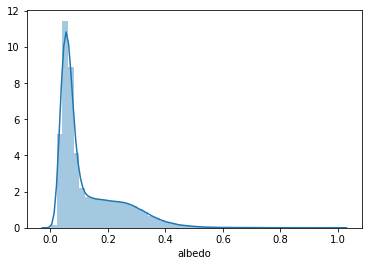

In [18]:
sns.distplot(df.albedo.dropna())

In [19]:
print(df['albedo'].describe())
print('\nThe maximum repeated value is : ',df['albedo'].value_counts().index[0])

count    136448.000000
mean          0.130050
std           0.109984
min           0.001000
25%           0.053000
50%           0.078000
75%           0.188000
max           1.000000
Name: albedo, dtype: float64

The maximum repeated value is :  0.057


In [20]:
#Since median is greater than mean, it is positively skewed. Hence, imputing with median.
df['albedo'].fillna(df['albedo'].median() , inplace = True)

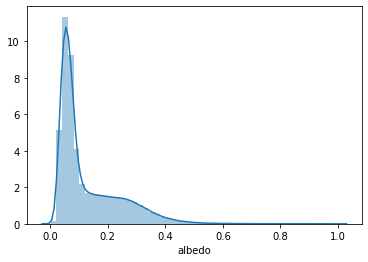

In [21]:
sns.distplot(df.albedo)

In [22]:
df.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
neo               0
pha               0
moid              0
dtype: int64

In [23]:
# To know the categries present in the categorical features.
list_of_cols = df.select_dtypes(['object'])
for col in list_of_cols:
    print(str(col) + ": "+ str(df[col].unique()))

condition_code: [0 1 3 2 '0' '1' '2' '3' '4' '5' '9' '7' 5.0 6.0 4.0 7.0 9.0 8.0 '8' '6']
neo: ['N' 'Y']
pha: ['N' 'Y']


#### Condition code is the orbit condition code which has the value between 0 and 9. As we can see from above, the values are in different formats.

In [24]:
df['condition_code'] = df['condition_code'].astype('int32')

In [25]:
df.condition_code.value_counts()

0    128209
9      6551
1      1372
2       397
5       334
7       207
6       188
4       177
3       168
8        77
Name: condition_code, dtype: int64

In [26]:
df.shape

(137680, 17)

<a id="t3.1."></a>
## 3.1. Exploration of Diameter

count    137680.000000
mean          5.480873
std           9.365499
min           0.002500
25%           2.770000
50%           3.956000
75%           5.741000
max         939.400000
Name: diameter, dtype: float64


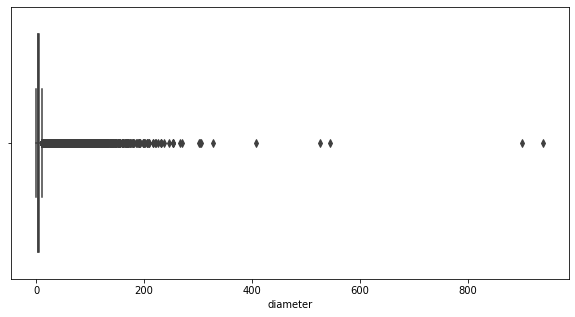

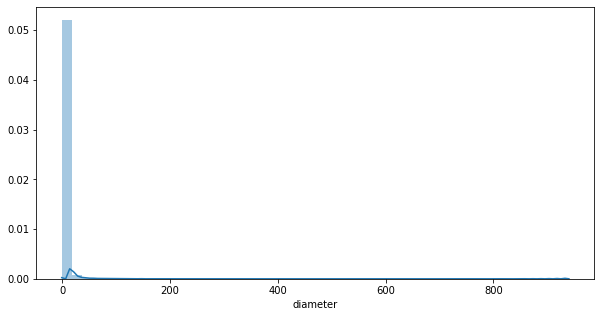

In [27]:
print(df['diameter'].describe())

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(x=df['diameter'])
plt.show()

# Distribution on rent 
plt.figure(figsize=(10,5))
sns.distplot(df['diameter']);
plt.show()

#### As we can see that the data is highly positive skewed . The difference between the 75th percentile and the maximum value is very large. However the outliers in this case are asteroids with high diameters which is  relevant  data  .

### Boxcox tranformation 

In [28]:
# import modules
import numpy as np
from scipy import stats
from sklearn.preprocessing import power_transform
col=['diameter','a','e','i','q','ad','per_y','data_arc','n_obs_used','albedo','moid']
for i in col:
    df[i], lvalue = stats.boxcox(df[i])

<a id="t3.19."></a>
## 3.19. Heatmap

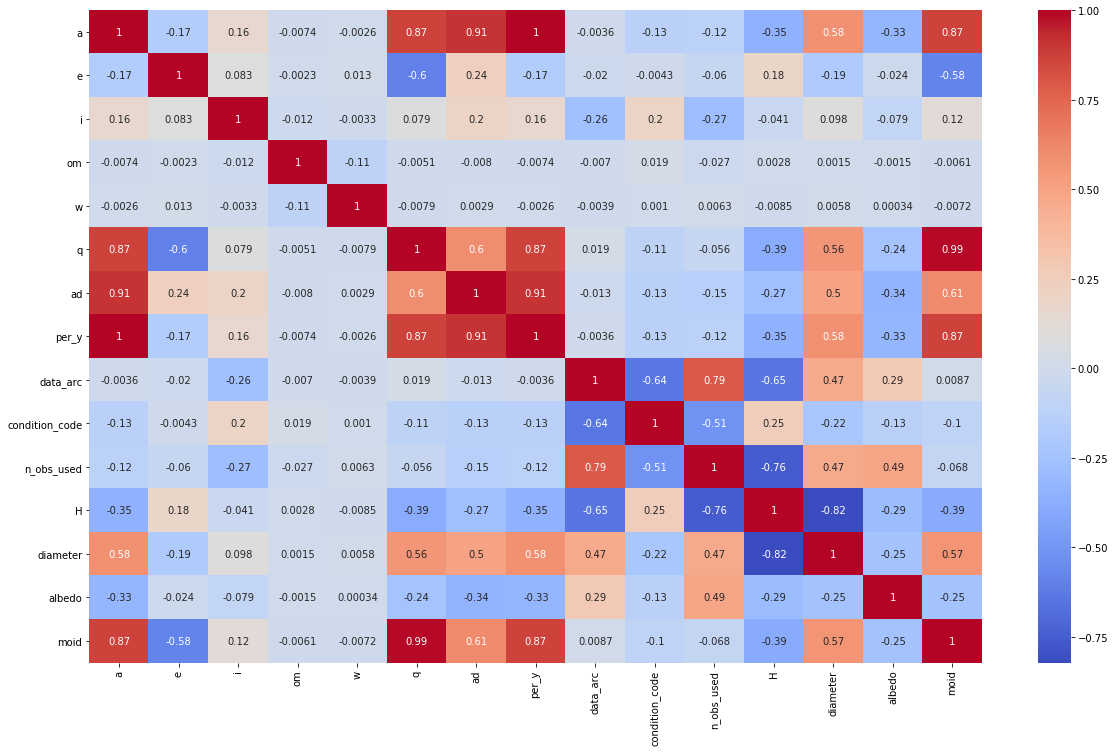

In [29]:
# Figure size
cor=df.corr()
plt.figure(figsize=(20,12))

# Heatmap
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

## OneHot Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
label_encode = LabelEncoder() 
onehot_encode = OneHotEncoder(sparse=False)

df['neo'] = label_encode.fit_transform(df['neo'])
df['pha'] = label_encode.fit_transform(df['pha'])

In [31]:
cat_df = pd.concat([df.condition_code , df.neo , df.pha] , axis = 1 )

In [32]:
onehot_encode.fit(cat_df)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [33]:
cat_df = onehot_encode.transform(cat_df)
cat_df

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [34]:
cat_df = pd.DataFrame(cat_df , columns= ['condition_code_0' , 'condition_code_1' , 'condition_code_2' , 'condition_code_3' , 'condition_code_4' , 'condition_code_5' , 'condition_code_6' , 'condition_code_7' , 'condition_code_8' , 'condition_code_9' , 'neo_0' , 'neo_1' , 'pha_0' , 'pha_1'])

In [35]:
# drooping the redudant columns and reseting the index 
df.drop(['condition_code','neo','pha',],axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)

In [36]:
df1= pd.concat([df , cat_df ], axis=1)
df1.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,condition_code_4,condition_code_5,condition_code_6,condition_code_7,condition_code_8,condition_code_9,neo_0,neo_1,pha_0,pha_1
0,0.843799,-1.464625,3.713068,80.305532,73.597694,1.052077,0.817198,1.265711,196.977478,25.798618,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.844606,-1.047389,7.175998,173.080063,310.048857,0.830133,0.887937,1.266921,577.403867,54.570679,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.818692,-0.992641,4.206153,169.852760,248.138626,0.743363,0.879546,1.228051,578.891807,51.340880,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.732499,-1.419088,2.855547,103.810804,150.728541,0.840217,0.733665,1.098762,330.845384,56.346923,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.793638,-1.134419,2.305834,141.576604,358.687608,0.800966,0.832623,1.190470,540.063843,37.469962,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<a id="t4."></a>
# 4. Modelling

In [37]:
X = df1.drop(['diameter'],axis=1)
y = df1['diameter']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="t4.1."></a>
# 4.1. Linear Regression

In [39]:
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression

# Fitting Multiple Linear Regression to the Training set
Multiple_regressor = LinearRegression()
Multiple_regressor.fit(X_train, y_train)

#prediciting the values of both train and test using the model 
MLR_y_Train_pred = Multiple_regressor.predict(X_train)
MLR_y_Test_pred = Multiple_regressor.predict(X_test)


# training and testing RMSE
MLR_Train_RMSE = np.sqrt(mean_squared_error(y_train , MLR_y_Train_pred))
MLR_Test_RMSE= np.sqrt(mean_squared_error(y_test , MLR_y_Test_pred))

# R-square score
MLR_r2 = r2_score(y_test , MLR_y_Test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(MLR_r2))
print()
print('Training RMSE is {}'.format(MLR_Train_RMSE))
print('Testing RMSE is {}'.format(MLR_Test_RMSE))

R_SQAURE_score is 0.947150107460583

Training RMSE is 0.119161531246541
Testing RMSE is 0.12017709413854114


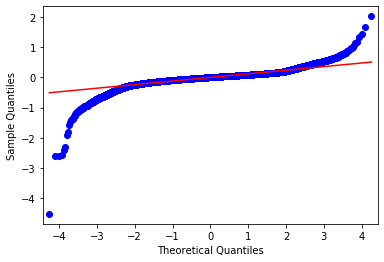

In [40]:
#Create a QQ Plot and interpret it?

import numpy as np 
import statsmodels.api as sm 
import pylab as py 
errors= y_train - MLR_y_Train_pred     
sm.qqplot(errors,line='s') 
py.show()

<a id="t4.2."></a>
# 4.2. Ridge Regression

In [41]:

from sklearn.linear_model import Ridge
Ridge_regressor = Ridge(alpha=0.5)
Ridge_regressor.fit(X_train , y_train)

#prediciting the values of both train and test using the model 
Ridge_y_Train_pred = Ridge_regressor.predict(X_train)
Ridge_y_Test_pred = Ridge_regressor.predict(X_test)

# training and testing RMSE
Ridge_Train_RMSE = np.sqrt(mean_squared_error(y_train , Ridge_y_Train_pred))
Ridge_Test_RMSE = np.sqrt(mean_squared_error(y_test , Ridge_y_Test_pred))

# R-square score
Ridge_r2 = r2_score(y_test , Ridge_y_Test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(Ridge_r2))
print()
print('Training RMSE is {}'.format(Ridge_Train_RMSE))
print('Testing RMSE is {}'.format(Ridge_Test_RMSE))

R_SQAURE_score is 0.9464454788296044

Training RMSE is 0.12008409247706668
Testing RMSE is 0.12097558047950675


<a id="t4.7."></a>
# 4.7. DecisionTree Regression 

In [42]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# Training the model
DecisionTree_regressor = DecisionTreeRegressor( criterion= 'mae' , max_depth = 4 , random_state = 10)  
DecisionTree_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
DecisionTree_y_Train_pred = DecisionTree_regressor.predict(X_train)
DecisionTree_y_Test_pred = DecisionTree_regressor.predict(X_test)


# training and testing RMSE
DecisionTree_Train_RMSE = np.sqrt(mean_squared_error(y_train , DecisionTree_y_Train_pred))
DecisionTree_Test_RMSE = np.sqrt(mean_squared_error(y_test , DecisionTree_y_Test_pred))

# R-square score
DecisionTree_r2 = r2_score(y_test , DecisionTree_y_Test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(DecisionTree_r2))
print()
print('Training RMSE is {}'.format(DecisionTree_Train_RMSE))
print('Testing RMSE is {}'.format(DecisionTree_Test_RMSE))

R_SQAURE_score is 0.8073447855714921

Training RMSE is 0.22583212866923516
Testing RMSE is 0.22945103890748628


<a id="t4.8."></a>
# 4.8. RandomForest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error 

# Training the model
RandomForest_regressor = RandomForestRegressor( n_estimators=150 , max_depth= 4 )  
RandomForest_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
RandomForest_y_Train_pred = RandomForest_regressor.predict(X_train)
RandomForest_y_Test_pred = RandomForest_regressor.predict(X_test)

# training and testing RMSE
RandomForest_Train_RMSE = np.sqrt(mean_squared_error(y_train , RandomForest_y_Train_pred))
RandomForest_Test_RMSE = np.sqrt(mean_squared_error(y_test , RandomForest_y_Test_pred))

# R-square score
RandomForest_r2 = r2_score(y_test , RandomForest_y_Test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(RandomForest_r2))
print()
print('Training RMSE is {}'.format(RandomForest_Train_RMSE))
print('Testing RMSE is {}'.format(RandomForest_Test_RMSE))


R_SQAURE_score is 0.8198697991263584

Training RMSE is 0.21981777720070284
Testing RMSE is 0.22186710215312586


<a id="t4.11."></a>
# 4.11. GRADIENT BOOSTING(GBM)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

GBoost_regressor= GradientBoostingRegressor( loss='huber' , max_depth = 3 , n_estimators= 150 , learning_rate= 0.1 )
GBoost_regressor.fit(X_train, y_train)


#prediciting the values of both train and test using the model 
GBoost_y_Train_pred = GBoost_regressor.predict(X_train)
GBoost_y_Test_pred  = GBoost_regressor.predict(X_test)

# training and testing RMSE
GBoost_Train_RMSE = np.sqrt(mean_squared_error(y_train , GBoost_y_Train_pred))
GBoost_Test_RMSE = np.sqrt(mean_squared_error(y_test , GBoost_y_Test_pred))

# R-square score
GBoost_r2 = r2_score( y_test , GBoost_y_Test_pred)


print('R_SQAURE_score is {}'.format(GBoost_r2))
print()
print('Training RMSE is {}'.format(GBoost_Train_RMSE))
print('Testing RMSE is {}'.format(GBoost_Test_RMSE))

R_SQAURE_score is 0.9622494103494086

Training RMSE is 0.09959267189438066
Testing RMSE is 0.10156907893148213


<a id="t4.12."></a>
# 4.12. XGBOOST

In [45]:
import xgboost as xgb
XGBoost_regressor = xgb.XGBRegressor( objective='reg:squarederror' , loss='lad' , max_depth = 4 , n_estimators= 150 , learning_rate= 0.05 )
XGBoost_regressor.fit(X_train, y_train)

#prediciting the values of both train and test using the model 
XGBoost_y_Train_pred = XGBoost_regressor.predict(X_train)
XGBoost_y_Test_pred = XGBoost_regressor.predict(X_test)

# training and testing RMSE
XGBoost_Train_RMSE = np.sqrt(mean_squared_error(y_train , XGBoost_y_Train_pred))
XGBoost_Test_RMSE = np.sqrt(mean_squared_error(y_test , XGBoost_y_Test_pred))

# R-square score
XGBoost_r2 = r2_score( y_test, XGBoost_y_Test_pred)


print('R_SQAURE_score is {}'.format(XGBoost_r2))
print()
print('Training RMSE is {}'.format(XGBoost_Train_RMSE))
print('Testing RMSE is {}'.format(XGBoost_Test_RMSE))


R_SQAURE_score is 0.9666909602729287

Training RMSE is 0.09249621660568255
Testing RMSE is 0.09540710118453836


In [46]:
results = pd.DataFrame({ 'Model'      : ['Linear Regression','Ridge Regressor','Decision Tree','Random Forest','Gradient Boosting','XGBoost'],
                         'R2'         : [MLR_r2         , Ridge_r2         , DecisionTree_r2         , RandomForest_r2         , GBoost_r2         , XGBoost_r2         ] ,
                         'Train RMSE' : [MLR_Train_RMSE , Ridge_Train_RMSE , DecisionTree_Train_RMSE , RandomForest_Train_RMSE , GBoost_Train_RMSE , XGBoost_Train_RMSE ] ,
                         'Test RMSE'  : [MLR_Test_RMSE  , Ridge_Test_RMSE  , DecisionTree_Test_RMSE  , RandomForest_Test_RMSE  , GBoost_Test_RMSE  , XGBoost_Test_RMSE  ] ,
                         
                         'Difference' : [(MLR_Test_RMSE - MLR_Train_RMSE),(Ridge_Test_RMSE - Ridge_Train_RMSE ),(DecisionTree_Test_RMSE - DecisionTree_Train_RMSE),(RandomForest_Test_RMSE - RandomForest_Train_RMSE),(GBoost_Test_RMSE - GBoost_Train_RMSE),(XGBoost_Test_RMSE - XGBoost_Train_RMSE)]
                       })

In [47]:
results.set_index('Model' , inplace = True )
results

,R2,Train RMSE,Test RMSE,Difference
Model,,,,
Linear Regression,0.947150,0.119162,0.120177,0.001016
Ridge Regressor,0.946445,0.120084,0.120976,0.000891
Decision Tree,0.807345,0.225832,0.229451,0.003619
Random Forest,0.819870,0.219818,0.221867,0.002049
Gradient Boosting,0.962249,0.099593,0.101569,0.001976
XGBoost,0.966691,0.092496,0.095407,0.002911


In [48]:
results.sort_values(['Difference'])

,R2,Train RMSE,Test RMSE,Difference
Model,,,,
Ridge Regressor,0.946445,0.120084,0.120976,0.000891
Linear Regression,0.947150,0.119162,0.120177,0.001016
Gradient Boosting,0.962249,0.099593,0.101569,0.001976
Random Forest,0.819870,0.219818,0.221867,0.002049
XGBoost,0.966691,0.092496,0.095407,0.002911
Decision Tree,0.807345,0.225832,0.229451,0.003619


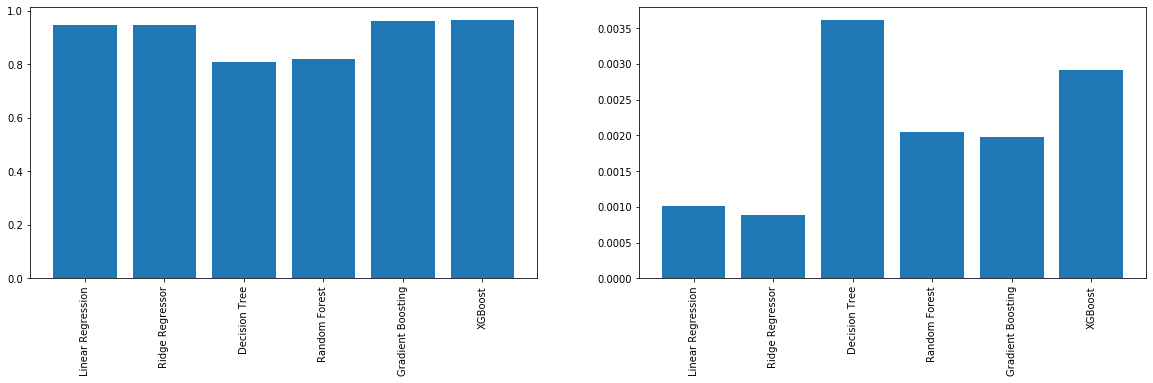

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (20,5))
ax1.bar(results.index , results['R2'])
ax2.bar(results.index , results['Difference'])
ax1.set_xticklabels(results.index, rotation=90)
ax2.set_xticklabels(results.index, rotation=90)
plt.show()

## Conclusion 

- As there isnt much of the difference between the test and training RMSE in all of the models 
- we select the one with the lowest difference as the best model 
- Ridge regression Model has a R2 value of 0.946 and has the lowest RMSE difference